<!-- # Oasis Infobyte sales Science Internship -->

# Sales Prediction using Python (Task-5)

### - Priyanshu Jha


In [2]:
# importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
sales = pd.read_csv('Advertising.csv', index_col=0)

sales_new = sales.copy()

In [4]:
sales.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
sales.shape

(200, 4)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
sales.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [8]:
# check for null values
sales.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


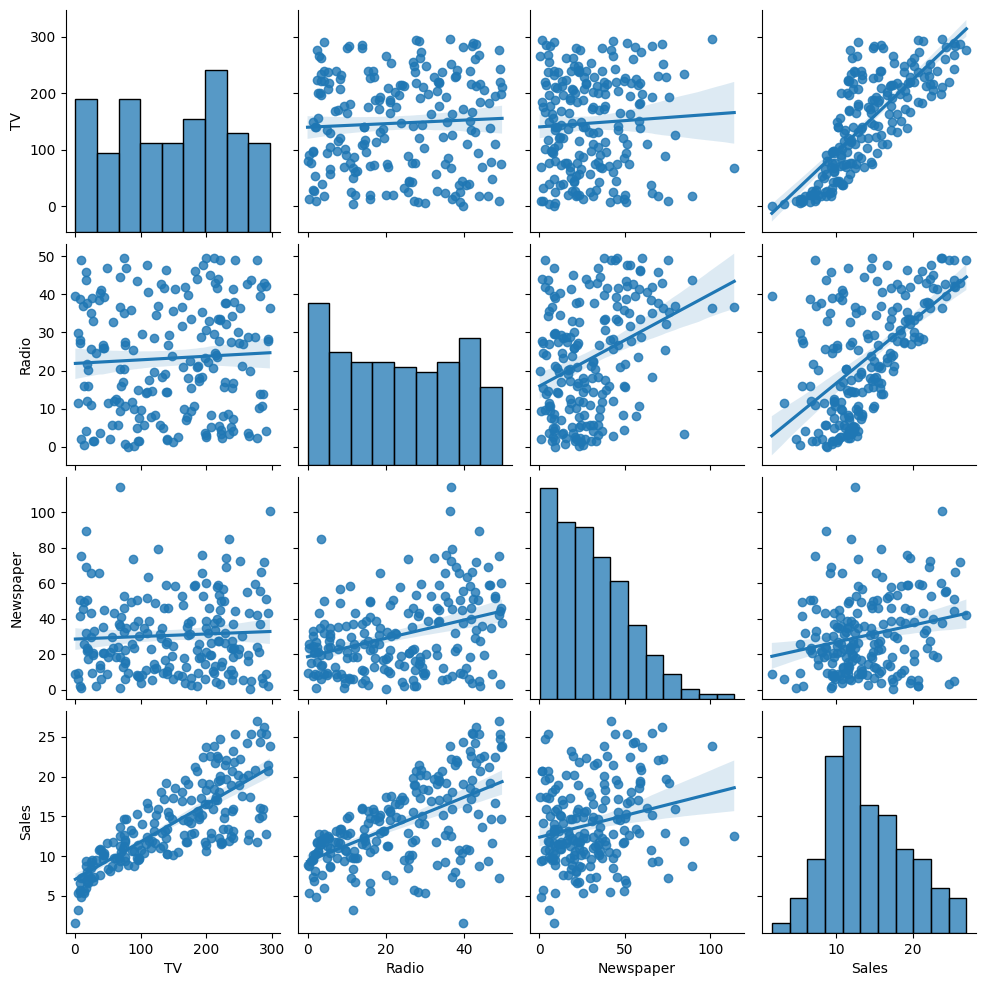

In [10]:
sns.pairplot(sales, kind="reg")

<Axes: xlabel='Newspaper', ylabel='Sales'>

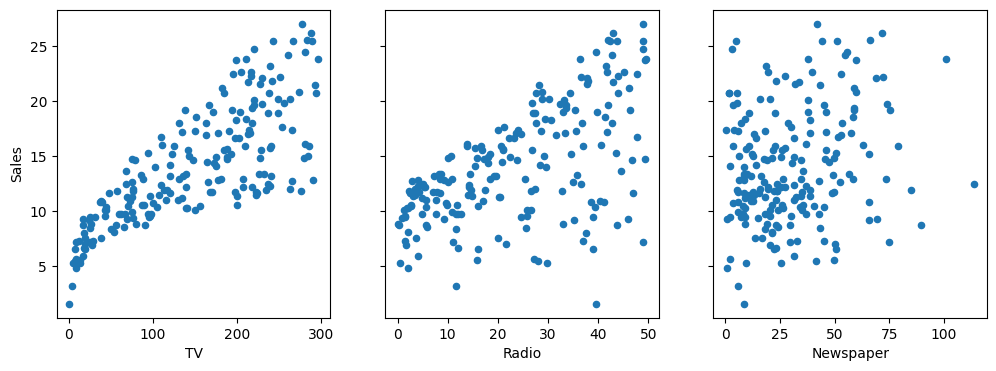

In [11]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 4))
sales.plot(kind="scatter", x='TV', y='Sales', ax=axs[0])
sales.plot(kind="scatter", x='Radio', y='Sales', ax=axs[1])
sales.plot(kind="scatter", x='Newspaper',y='Sales', ax=axs[2])

<Axes: >

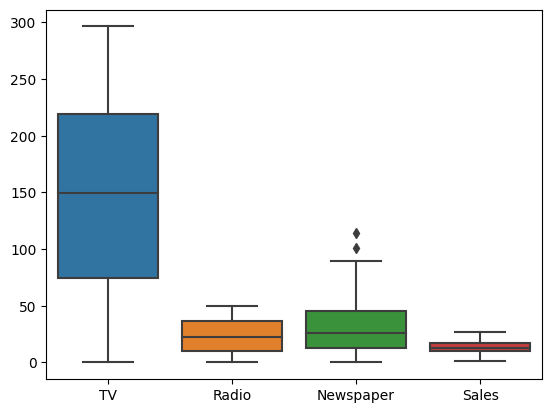

In [12]:
sns.boxplot(sales)

In [13]:
# removing the outlier from newspaper

sales = sales[sales['Newspaper'] <= 90]
sales.shape

(198, 4)

In [14]:
sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

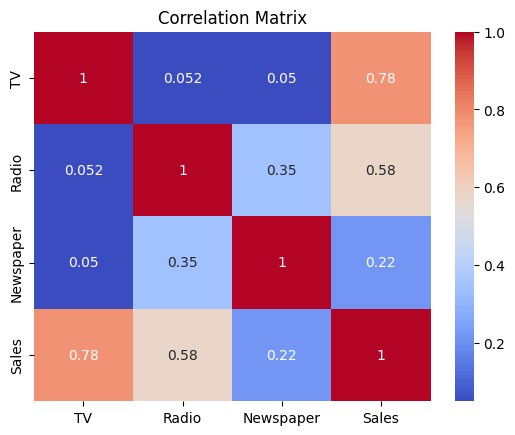

In [27]:
# Compute the correlation matrix
correlation_matrix = sales.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Set the plot title
plt.title("Correlation Matrix")


In [28]:
# Separating input and output data

x = sales.drop(columns=['Sales'])
y = sales['Sales']

In [29]:
x.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [30]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [35]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=22)

In [36]:
x_train.head()

,TV,Radio,Newspaper
3,17.2,45.9,69.3
56,198.9,49.4,60.0
200,232.1,8.6,8.7
199,283.6,42.0,66.2
173,19.6,20.1,17.0


In [37]:
y_test.head()

113    14.1
48     23.2
38     14.7
99     25.4
97     11.7
Name: Sales, dtype: float64

In [38]:
# Initialize the Random Forest regressor
rf = RandomForestRegressor()

# Train the model
rf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(x_test)

In [39]:
# print y_test
y_test.values

array([14.1, 23.2, 14.7, 25.4, 11.7, 25.4, 11.9,  8.7,  7.2, 17.4, 20.2,
       19.4,  5.3, 12.2, 20.7, 12.5,  5.9,  9.2,  7. ,  7.3,  6.7, 10.3,
       19.8, 19. , 11. ,  8. , 15.5,  8.8, 18. , 18.5, 11.6, 17.6, 10.7,
       17.2,  9.7, 14.6, 14.4, 11.8, 15.7, 15.6,  8.7,  9.6, 22.2, 11.7,
       11. , 13.3, 13.6, 15. ,  8.5,  6.9, 12.6, 13.4, 16.1, 11.6,  9.7,
        9.9,  8.6, 10.5, 12. , 12.8])

In [40]:
# compare it with y_pred
y_pred

array([14.136, 22.475, 12.983, 25.286, 11.514, 24.118, 12.735,  8.722,
        8.276, 15.778, 19.982, 19.272,  3.77 , 12.127, 20.053, 12.254,
        6.704,  9.631,  7.596,  8.174,  6.739, 10.502, 19.16 , 18.986,
       11.133,  8.165, 15.393,  9.242, 18.005, 18.189, 11.895, 15.792,
       10.724, 18.076, 10.326, 12.797, 14.268, 10.661, 15.183, 15.421,
        8.365,  9.857, 21.079, 12.166, 11.377, 13.304, 11.904, 15.915,
        9.081,  7.864, 13.068, 12.344, 15.178, 11.362, 10.158, 10.048,
        9.139, 10.786, 12.219, 12.837])

Evaluating The Model

In [41]:
# calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.7565617181257154


In [42]:
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.9752759391740969
